## Classification Models to predict stroke cases or not.

A stroke is a medical condition in which poor blood flow to the brain causes cell death. This dataset contains multiple variables which can be used to predict if a patient is likely to have stroke or not. Dataset can be viewed here [Kaggle](https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset).

### Load Packages

In [366]:
#Basics
import pandas as pd
import numpy as np

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#SkLearn ML General
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_curve, auc, precision_score
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay


#SkLearn ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

### Load Data

In [367]:
stroke_df = pd.read_csv("../Final Project/brain_stroke.csv")

### View and Assess Data 

In [368]:
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [369]:
stroke_df.shape
print("Number of Rows:", stroke_df.shape[0],
     "\n"
     "Number of Columns:", stroke_df.shape[1])

Number of Rows: 4981 
Number of Columns: 11


There are 4981 observations and 11 variables in this dataset

In [370]:
stroke_df.info()

print("There are 5 Categorical Variables",
     "\n"
     "There are 3 Floats",
     "\n"
     "There are 3 Integers")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB
There are 5 Categorical Variables 
There are 3 Floats 
There are 3 Integers


Next, we will convert the age variable to Integer

In [371]:
stroke_df['age'] = stroke_df['age'].astype(int)

In [372]:
stroke_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

There are no null values in the dataset. 

In [373]:
stroke_df.select_dtypes(include= 'object').nunique()

gender            2
ever_married      2
work_type         4
Residence_type    2
smoking_status    4
dtype: int64

### Exploratory Data Analysis

Let us look at the Target variable.

In [374]:
def cat_var (data, variable, title):
    sns.countplot(data=stroke_df, x= variable)
    plt.title(title)
    plt.show()

    # Display value counts
    value_counts = data[variable].value_counts(normalize = True)
    print(value_counts)

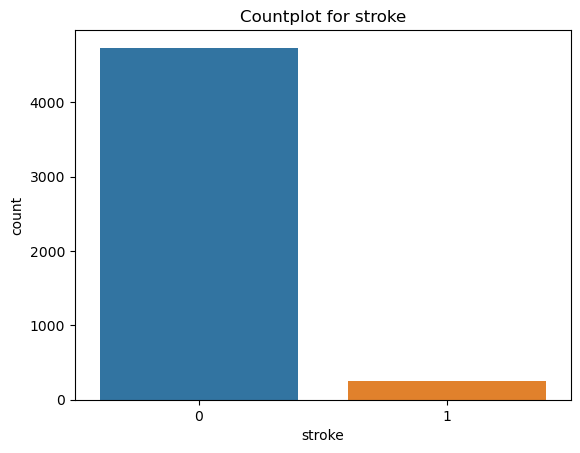

0    0.950211
1    0.049789
Name: stroke, dtype: float64


In [375]:
cat_var(stroke_df, 'stroke', 'Countplot for stroke')

We see that there are more observations with no stroke than observations with stroke. Over 95% do not have stroke and less than 0.05% have stroke.
This is a class imbalance problem which will affect the model performance, later on we will weigh them balanced while fitting into the classifiers. 

In [376]:
def cat_var_hue(data, variable, hue=None, title=None):
    sns.countplot(data = stroke_df, x = variable, hue = hue)
    plt.title(title)
    plt.show()

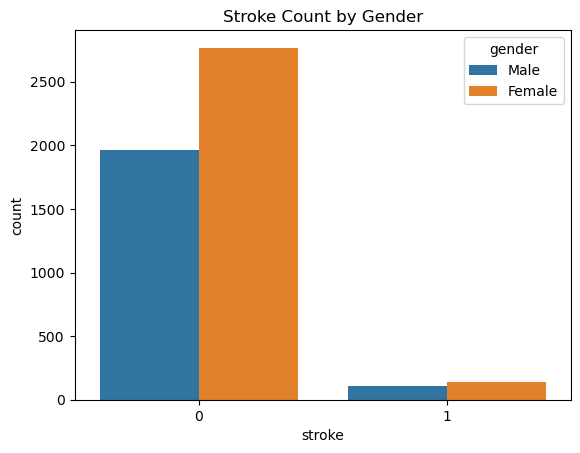

In [377]:
cat_var_hue(stroke_df,'stroke', hue = 'gender', title='Stroke Count by Gender')

Generally, Females have a higher number of having stroke and not having stroke than males. However, the Difference between stroke by gender is not much, a little more than 0.01%

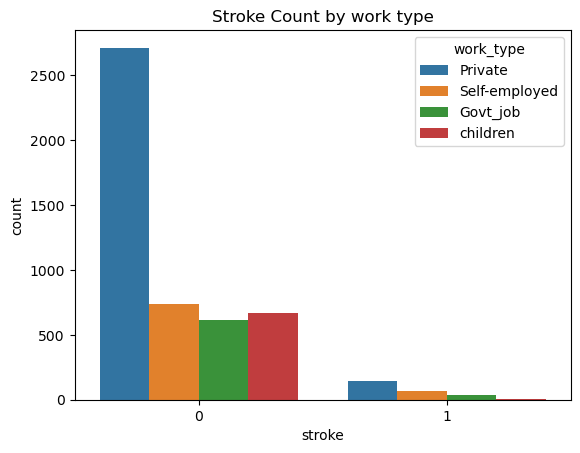

In [378]:
cat_var_hue(stroke_df,'stroke', hue = 'work_type', title='Stroke Count by work type')

We see that most people who have stroke work in private organizations. 

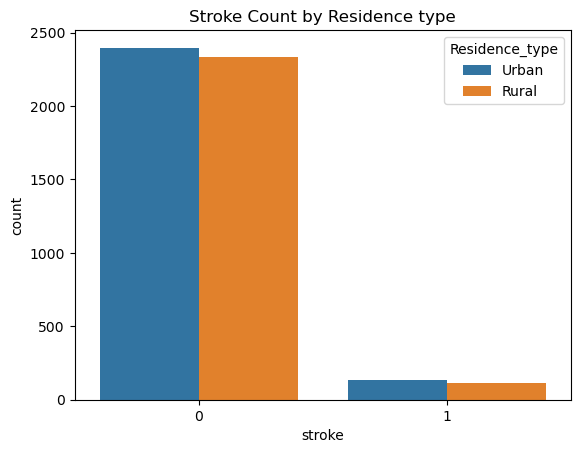

In [379]:
cat_var_hue(stroke_df,'stroke', hue = 'Residence_type', title='Stroke Count by Residence type')

People living in Urban Areas have stroke more than Rural Area Inhabitants.

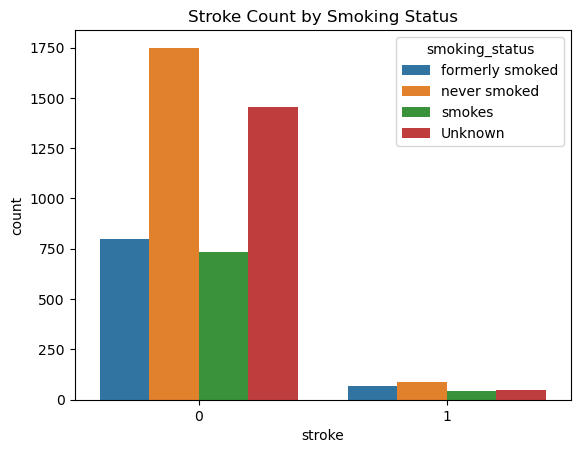

In [380]:
cat_var_hue(stroke_df,'stroke', hue = 'smoking_status', title='Stroke Count by Smoking Status')

It shows that people that never smoked have stroke the most. Normally, people who smoke or formally smoke tend to have stroke. We shall investigate further. 

Now, we do some analysis on the numerical variables.

In [381]:
def stats(data, variable):
    sns.distplot(data[variable])
    data[variable].describe()

    print(data[variable].describe())

C:\Users\Bolaji\AppData\Local\Temp\ipykernel_37312\3962176259.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[variable])


count    4981.000000
mean       43.408552
std        22.683945
min         0.000000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64


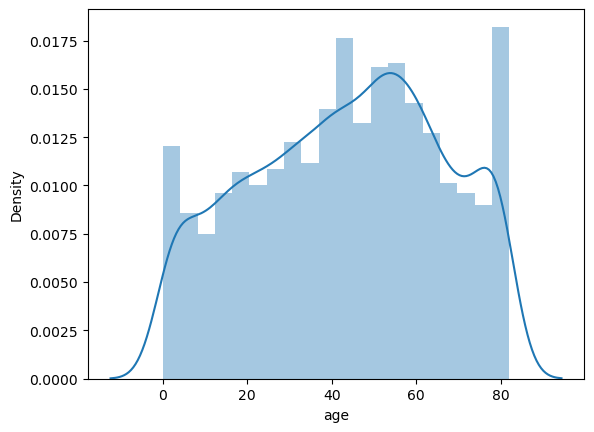

In [382]:
stats(stroke_df, 'age')

The average age is 43 years old. The minimum age is 0 and maximum age is 82 years old. It looks like a gaussian distribution. 

C:\Users\Bolaji\AppData\Local\Temp\ipykernel_37312\3962176259.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[variable])


count    4981.000000
mean       28.498173
std         6.790464
min        14.000000
25%        23.700000
50%        28.100000
75%        32.600000
max        48.900000
Name: bmi, dtype: float64


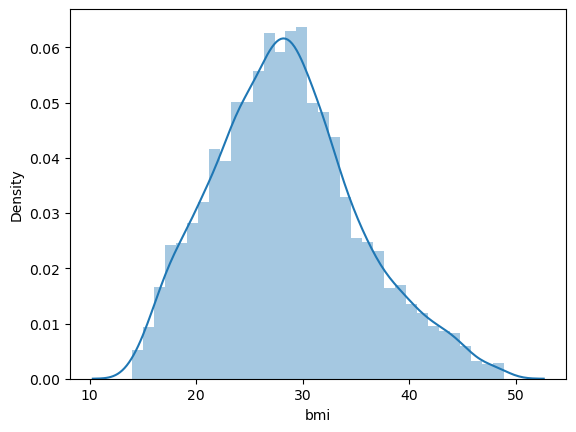

In [383]:
stats(stroke_df, 'bmi')

The distribution also looks like a gaussian distribution. There is an average BMI of 28.49, minimum of 14 and maximum BMI of 48.

C:\Users\Bolaji\AppData\Local\Temp\ipykernel_37312\3962176259.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[variable])


count    4981.000000
mean      105.943562
std        45.075373
min        55.120000
25%        77.230000
50%        91.850000
75%       113.860000
max       271.740000
Name: avg_glucose_level, dtype: float64


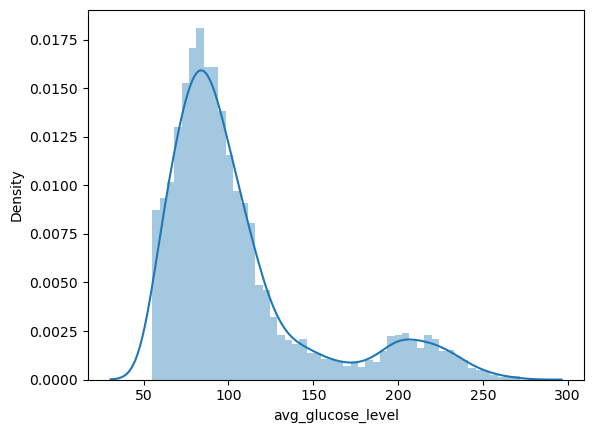

In [384]:
stats(stroke_df, 'avg_glucose_level')

This distribution is quite different, it is right skewed and looks to have two peaks. The peaks represent two different categories, meaning that there are variations between probably male and female distribution.

In [385]:
numeric_cols = stroke_df.select_dtypes(exclude = 'object')

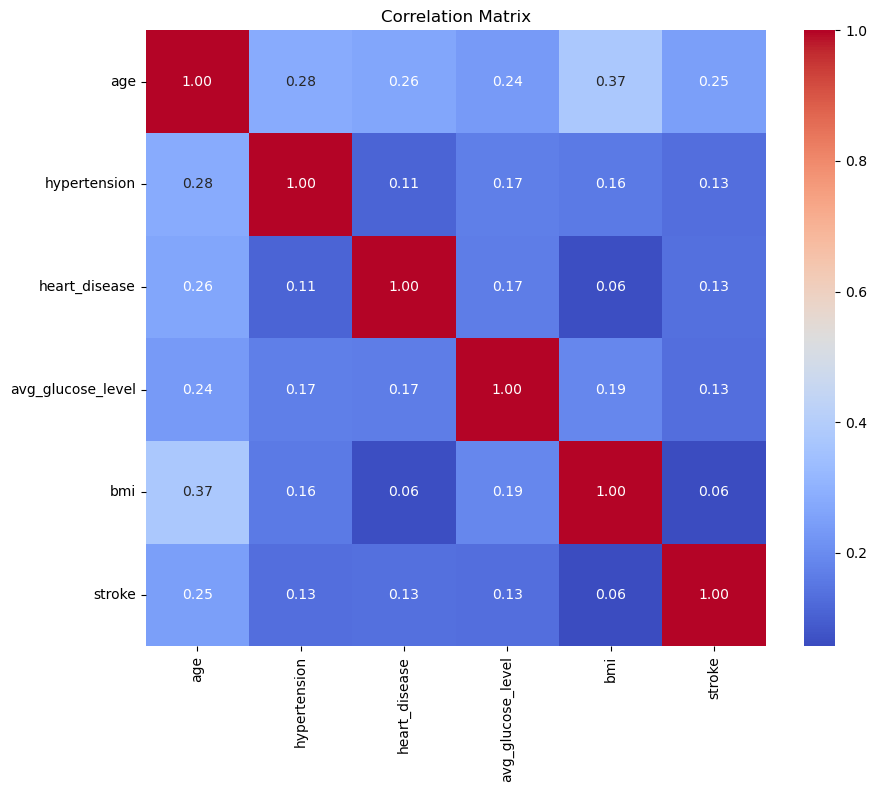

In [386]:
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The correlation matrix shows the relationships between the numerical variables, from this we can observe weak relationships between the independent variables and target variable. 

### Fit Classifiers

In [387]:
dummy = pd.get_dummies(stroke_df.select_dtypes(include='object'), drop_first=True)
stroke_df = pd.concat([stroke_df.select_dtypes(exclude='object'), dummy], axis=1)

In [388]:
x = stroke_df.drop(['stroke'], axis=1)
y = stroke_df['stroke']

In [389]:
x.shape

(4981, 14)

In [390]:
y.shape

(4981,)

In [391]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print("x_train has {0} rows and {1} columns".format(x_train.shape[0], x_train.shape[1]))
print("x_test has {0} rows and {1} columns".format(x_test.shape[0], x_test.shape[1]))
print("y_train has {0} rows".format(y_train.count()))
print("y_test has {0} rows".format(y_test.count()))

x_train has 3486 rows and 14 columns
x_test has 1495 rows and 14 columns
y_train has 3486 rows
y_test has 1495 rows


In [404]:
logistic_model = LogisticRegression(class_weight='balanced', max_iter = 1000)
decision_trees = DecisionTreeClassifier(random_state = 0, class_weight='balanced', max_depth = 3)

In [405]:
logistic_model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [406]:
decision_trees.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=0)

In [407]:
logistic_pred = logistic_model.predict(x_test)
decision_pred = decision_trees.predict(x_test)

In [408]:
logistic_model.score(x_test, y_test)

0.7498327759197324

We can see that the logistic regression model has an accuracy of ~75%

In [409]:
decision_trees.score(x_test, y_test)

0.7050167224080267

We can see that the Decision Trees has an accuracy of ~71%

The Logistic Regression model has a higher accuracy, but this does not mean that it is a better model as accuracy is not always the best metric for model evaluation. We will be looking at other metrics such as Precision, Recall and F-Score

### Model Evaluation

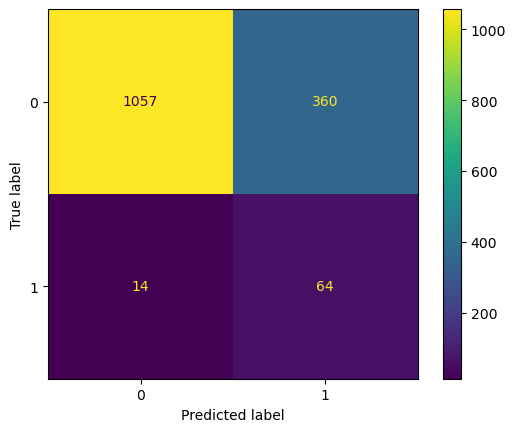

In [413]:
conf_mat_lr = confusion_matrix(y_test, logistic_pred)

tn_lr = conf_mat_lr[0][0]
fp_lr = conf_mat_lr[0][1]
fn_lr = conf_mat_lr[1][0]
tp_lr = conf_mat_lr[1][1]

cm_display_lr = ConfusionMatrixDisplay(confusion_matrix=conf_mat_lr)

cm_display_lr.plot()

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()

In [414]:
print("True Negatives (Correct Not-Stroke): ", tn_lr)
print("False Positives (Incorrect Stroke): ", fp_lr)
print("False Negatives (Incorrect Not-Stroke): ", fn_lr)
print("True Positives (Correct Stroke)", tp_lr)

True Negatives (Correct Not-Stroke):  1057
False Positives (Incorrect Stroke):  360
False Negatives (Incorrect Not-Stroke):  14
True Positives (Correct Stroke) 64


The model does a good job predicting the number of Correct non stroke cases, also does a decent job correctly identifying stroke cases. Also, we have low False Negative cases and high False Positive cases. In this case, we prefer to have a low False Positive value which is the case here, so our model is doing a good job.

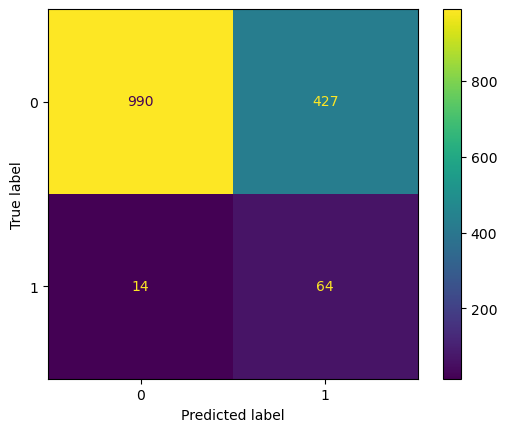

In [415]:
conf_mat_dt = confusion_matrix(y_test, decision_pred)

tn_dt = conf_mat_dt[0][0]
fp_dt = conf_mat_dt[0][1]
fn_dt = conf_mat_dt[1][0]
tp_dt = conf_mat_dt[1][1]

cm_display_dt = ConfusionMatrixDisplay(confusion_matrix=conf_mat_dt)

cm_display_dt.plot()

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()

In [416]:
print("True Negatives (Correct Not-Stroke): ", tn_dt)
print("False Positives (Incorrect Stroke): ", fp_dt)
print("False Negatives (Incorrect Non-Stroke): ", fn_dt)
print("True Positives (Correct Stroke)", tp_dt)

True Negatives (Correct Not-Stroke):  990
False Positives (Incorrect Stroke):  427
False Negatives (Incorrect Non-Stroke):  14
True Positives (Correct Stroke) 64


The decision tree model also looks to be performing well classifying stroke and not stroke cases. 

In [430]:
precision_lr = precision_score(y_test, logistic_pred)
recall_lr = recall_score(y_test, logistic_pred)
f1_score_lr = f1_score(y_test, logistic_pred)

print("Logistic Regression Classifier Metrics:")
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_score_lr)

Logistic Regression Classifier Metrics:
Precision: 0.1509433962264151
Recall: 0.8205128205128205
F1 Score: 0.2549800796812749


We see that our model gives us ~15% precision, meaning about 15% were actually positive. 
Recall score of 82% which is high and F1 score of 25%

In [418]:
precision_dt = precision_score(y_test, decision_pred)
recall_dt = recall_score(y_test, decision_pred)
f1_score_dt = f1_score(y_test, decision_pred)

print("Decision Trees Metrics:")
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_score_dt)

Decision Trees Metrics:
Precision: 0.13034623217922606
Recall: 0.8205128205128205
F1 Score: 0.22495606326889278


The decision tree model gives us ~13% precision, meaning about 13% were actually positive. 
Recall score of 82% which is also high and F1 score of 22%

The results indicate that our model is not precise, but correctly identifies actual positive cases.

In order to pick a best performing model, we will plot a ROC curve

### Plotting ROC Curve

In [419]:
probs_lr = logistic_model.predict_proba(x_test)
probs_lr

array([[0.19241851, 0.80758149],
       [0.99469162, 0.00530838],
       [0.99787533, 0.00212467],
       ...,
       [0.75917386, 0.24082614],
       [0.99761329, 0.00238671],
       [0.14234356, 0.85765644]])

In [420]:
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, probs_lr[:,1], pos_label=1)

In [421]:
roc_auc_lr = auc(fpr_lr, tpr_lr)
print("AUC: ", roc_auc_lr)

AUC:  0.8470676582885475


In [422]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

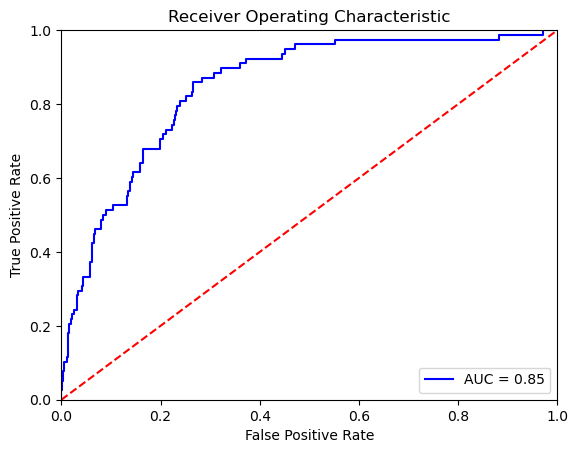

In [424]:
plot_roc_curve(fpr_lr, tpr_lr, roc_auc_lr)

The averge model AUC is 0.50 and the logistic regression model has an AUC of 0.85. This signifies that it is doing a good classification job.

Let us try the decision trees. 

In [425]:
probs_dt = decision_trees.predict_proba(x_test)
probs_dt

array([[0.25617724, 0.74382276],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.62522957, 0.37477043],
       [1.        , 0.        ],
       [0.16928665, 0.83071335]])

In [426]:
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test, probs_dt[:,1], pos_label=1)

In [427]:
roc_auc_dt = auc(fpr_dt, tpr_dt)
print("AUC: ", roc_auc_dt)

AUC:  0.8191240070209724


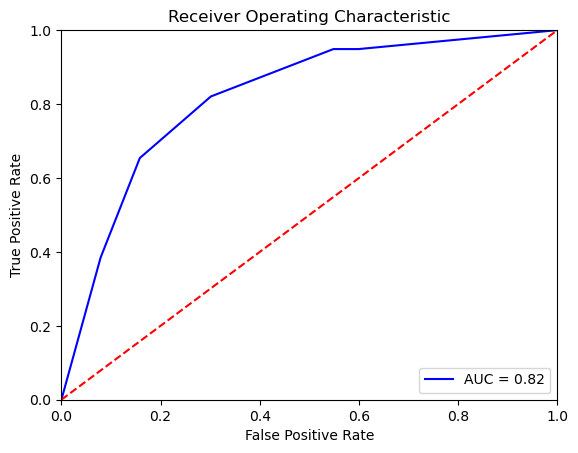

In [428]:
plot_roc_curve(fpr_dt, tpr_dt, roc_auc_dt)

The decision tree model has an AUC of ~82%.

### Conclusion

After comparing both models, we pick the logistic resgrssion model as it has a higher AUC.